### Netflix Dataset - Prepared for Women Who Code - Python for Data Analysis Series


Women Who Code - Silicon Valley - Sample Generated Dataset

For use by Silicon Valley Women Who Code workshop attendees. All data in this data set is generated and should only be used for educational purposes.

About this dataset

Welcome to the future! The year is roughly 2217, and Netflix is still streaming. There are however, many more planets which have been discovered and most of them stream Netflix too! (Netflix 45 is a ‘datacenter’ planet whose surface is 98% covered in servers, so we don’t see much streaming from there except for our technicians).

This dataset contains information on streaming over the holiday period for 2217, where movies about christmas are somehow still popular. In the future, Holographic devices and VR have become the defacto way to watch Netflix, so you won’t find any TV’s in this dataset. Also, PlanetConnect is the network of choice for streaming.

Fields



num_views : The number of times this movie was watched
avg_view_time_mins : The average viewing time for the movie 
released : When the movie was released
is_trailer : If the movie being played was a trailer
planet : The planet where this viewing session occurred
device : The device which streamed the movie
date_viewed : Date the movie was watched, in UTC
hour_viewed : hour the movie was watched, in UTC
genre : Genre of the movie
show_desc : Description of the show, we couldn’t get future movies, so they are just numbered.



avg_time_to_app_start : How long it takes for the app to start
audio_language : Which audio language was used
sub_language : Which subtitle language was used
avg_planetconnect_bps : The average speed of the network connection
avg_planetconnect_errors : The average number of errors 

Questions you can ask this dataset

Which planet streams the most?
Which devices are most popular on which planets?
Which device is most popular overall?
Which planets have the best (and the worst) internet connection?
What else can you think of to analyze?

Download the dataset (393,000 records, 50MB csv)

https://drive.google.com/file/d/1z5a6gZT94WRwzuXHhwKZmbsm3zvlEsjD/view?usp=sharing


In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
#import datasets
netflix_df=pd.read_csv("nflx-sv-whc-sample-dataset.csv")

In [5]:
netflix_df.head()

,num_views,avg_view_time_mins,released,is_trailer,planet,device,date_viewed,hour_viewed,genre,show_desc,avg_time_to_app_start,audio_language,sub_language,avg_planetconnect_bps,avg_planetconnect_errors
0,2,2.333333,2139,0,Planet Redworf,Holo Famicom,22171223,20,Kidz Stuff,Movie 1140,772.5,en,NaN,52500.0,0.0
1,1,65.333333,2179,0,Planet Corrin,Holo TV,22171224,4,Comedy,Christmas Movie 625,650.0,en,en,173460.0,0.0
2,2,0.000000,2182,0,Earth,Atari Holo 2600,22171227,16,Comedy,Movie 783,1130.5,en,NaN,25365.0,0.0
3,1,3.333333,2144,0,Earth,Atari Holo 2600,22171228,14,Horror,Movie 1023,2480.0,en,NaN,33030.0,0.0
4,1,16.666667,2184,0,Streamtopia 4,HoloStreamer,22171228,14,Kidz Stuff,Movie 702,736.0,en,NaN,99750.0,0.0


In [6]:
netflix_df.shape

(394464, 15)

In [7]:
netflix_df.describe()

,num_views,avg_view_time_mins,released,is_trailer,date_viewed,hour_viewed,avg_time_to_app_start,avg_planetconnect_bps,avg_planetconnect_errors
count,394464.000000,394464.000000,394464.000000,394464.000000,3.944640e+05,394464.000000,3.831980e+05,394464.000000,394464.000000
mean,1.184838,21.969633,2188.559374,0.016904,2.217123e+07,11.388030,2.721421e+03,70070.604423,0.035501
std,0.875780,25.197199,14.828366,0.128912,1.709362e+00,7.914089,1.882735e+04,57823.376191,0.476142
min,1.000000,0.000000,2076.000000,0.000000,2.217122e+07,0.000000,0.000000e+00,0.000000,-0.333333
25%,1.000000,0.000000,2181.000000,0.000000,2.217122e+07,4.000000,8.390000e+02,22500.000000,0.000000
50%,1.000000,10.666667,2192.000000,0.000000,2.217123e+07,12.000000,1.457000e+03,52470.000000,0.000000
75%,1.000000,40.000000,2199.000000,0.000000,2.217123e+07,19.000000,2.461000e+03,104550.000000,0.000000
max,79.000000,160.666667,2213.000000,1.000000,2.217123e+07,23.000000,1.200000e+06,480000.000000,91.333333


In [9]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394464 entries, 0 to 394463
Data columns (total 15 columns):
num_views                   394464 non-null int64
avg_view_time_mins          394464 non-null float64
released                    394464 non-null int64
is_trailer                  394464 non-null int64
planet                      394464 non-null object
device                      394464 non-null object
date_viewed                 394464 non-null int64
hour_viewed                 394464 non-null int64
genre                       394464 non-null object
show_desc                   394464 non-null object
avg_time_to_app_start       383198 non-null float64
audio_language              317461 non-null object
sub_language                94348 non-null object
avg_planetconnect_bps       394464 non-null float64
avg_planetconnect_errors    394464 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 45.1+ MB


###### Which planet streams the most?

In [15]:
#which planet streams most
netflix_df.planet.value_counts().sort_values(ascending=False).head(10)

Earth              187740
Planet Redworf      32553
Wopr                19549
Lightman 9          16554
Planet Ballibee     14512
Planet Telex        13730
Wowhco 42           13412
Streamtopia 4       13055
Pieton 11           13004
Emilon 7             8421
Name: planet, dtype: int64

In [20]:
#How many unique planets
netflix_df.planet.nunique()

26

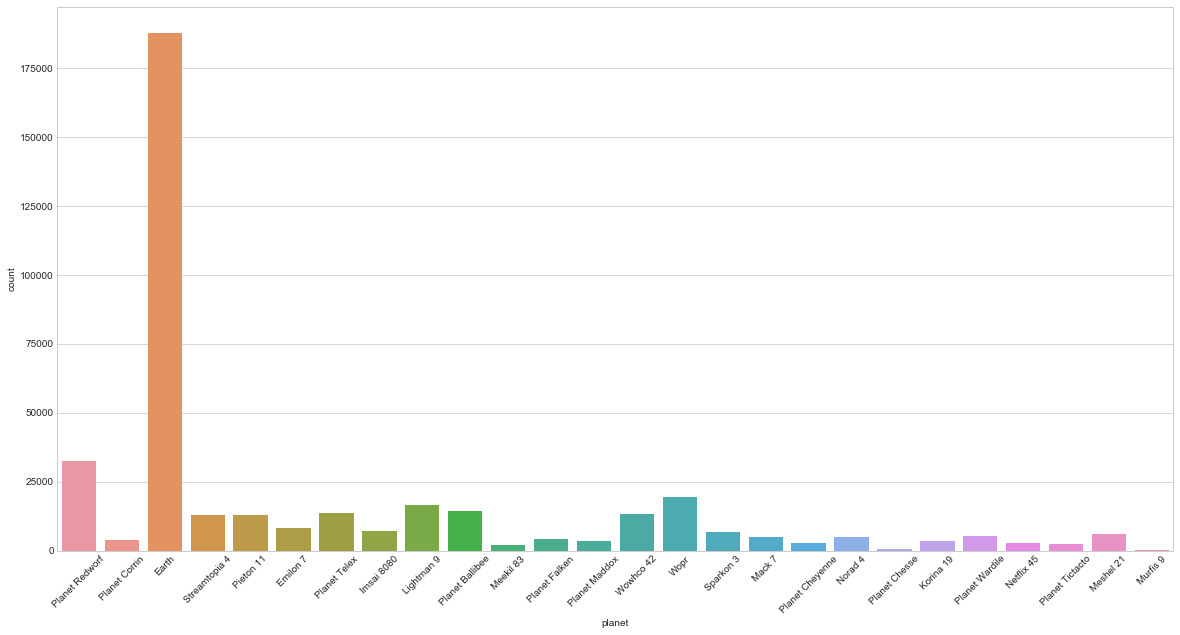

In [19]:
#plot stream count by planet
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.countplot(netflix_df.planet)

###### Which devices are most popular on which planets?

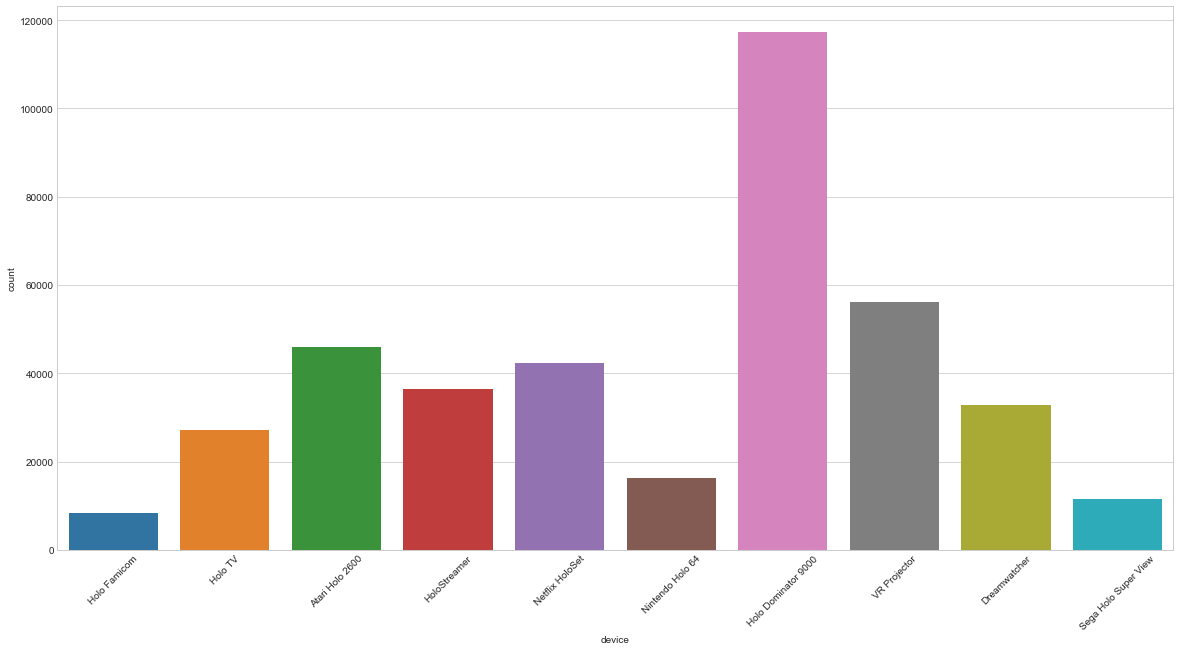

In [29]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.countplot(netflix_df.device)

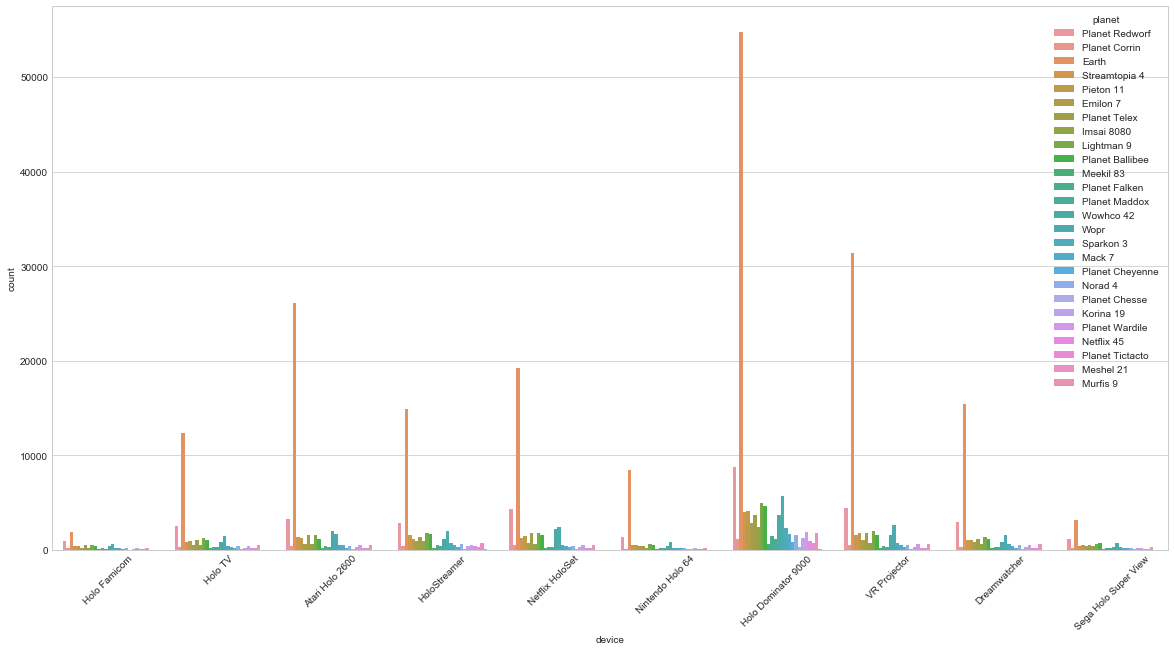

In [39]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.countplot(netflix_df.device,hue=netflix_df.planet)

In [32]:
pd.crosstab(netflix_df.planet,netflix_df.device)

device,Atari Holo 2600,Dreamwatcher,Holo Dominator 9000,Holo Famicom,Holo TV,HoloStreamer,Netflix HoloSet,Nintendo Holo 64,Sega Holo Super View,VR Projector
planet,,,,,,,,,,
Earth,26076,15455,54734,1910,12348,14920,19262,8429,3209,31397
Emilon 7,650,783,2828,241,552,899,710,386,357,1015
Imsai 8080,591,588,2432,219,523,899,657,243,383,738
Korina 19,308,298,1221,117,246,407,258,117,181,335
Lightman 9,1590,1385,4941,513,1220,1793,1831,615,630,2036
Mack 7,551,424,1644,196,293,554,431,233,243,529
Meekil 83,164,168,669,76,150,249,190,73,78,201
Meshel 21,553,586,1815,198,482,733,525,230,302,616
Murfis 9,33,33,113,10,38,49,32,20,16,38


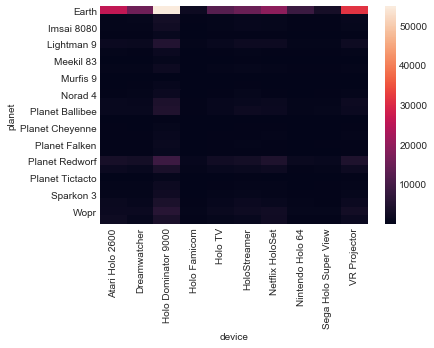

In [41]:
sns.heatmap(pd.crosstab(netflix_df.planet,netflix_df.device))

###### Which device is most popular overall?

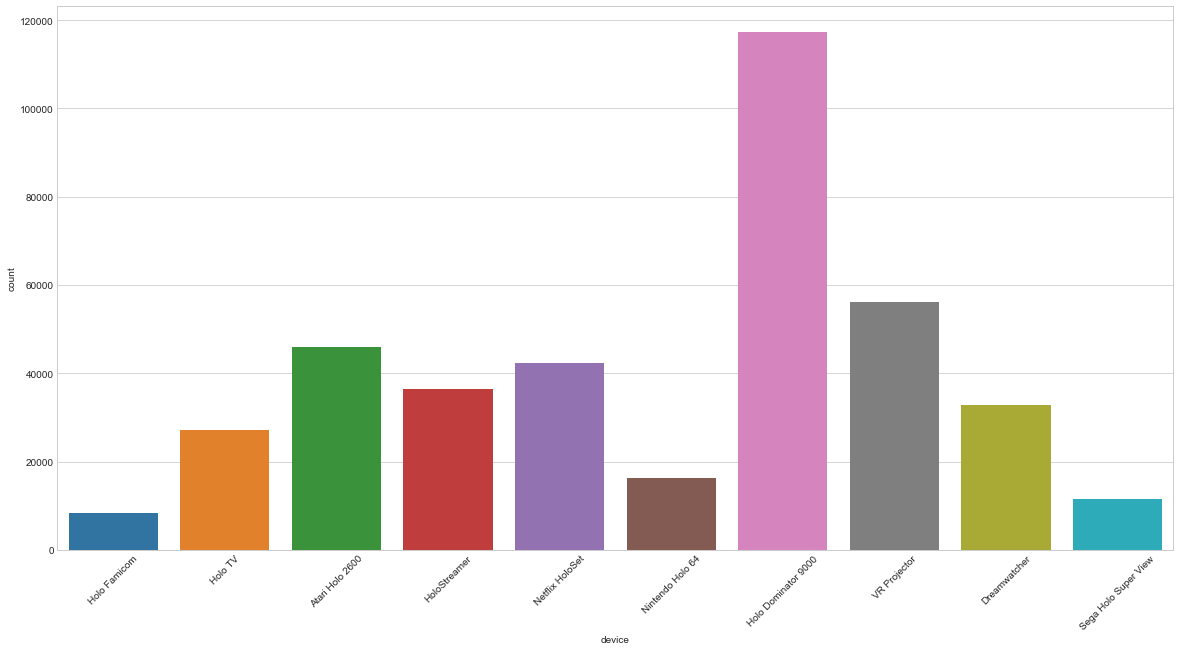

In [42]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.countplot(netflix_df.device)

###### Which planets have the best (and the worst) internet connection?

In [45]:
netflix_df.groupby(['planet']).mean()['avg_planetconnect_bps'].sort_values(ascending=False).head(10)

planet
Murfis 9           87196.531414
Planet Chesse      78295.231176
Wowhco 42          77241.513935
Planet Telex       77006.273294
Pieton 11          76773.736827
Planet Tictacto    75419.414174
Meshel 21          75355.581258
Planet Maddox      75167.283244
Norad 4            74931.561490
Planet Redworf     74659.683780
Name: avg_planetconnect_bps, dtype: float64

In [46]:
netflix_df.groupby(['planet']).mean()['avg_planetconnect_bps'].sort_values(ascending=False).tail(10)

planet
Mack 7             71670.399078
Wopr               71562.461481
Planet Ballibee    70749.808458
Planet Falken      70661.287351
Planet Cheyenne    70628.862481
Korina 19          69875.390052
Sparkon 3          69569.280774
Imsai 8080         69450.556227
Streamtopia 4      68416.234752
Earth              66535.308161
Name: avg_planetconnect_bps, dtype: float64

###### What else can you think of to analyze?

###### Which planets have the best (and the worst) internet connection errors?

In [47]:
netflix_df.groupby(['planet']).mean()['avg_planetconnect_errors'].sort_values(ascending=False).head(10)

planet
Sparkon 3          0.049256
Planet Maddox      0.043831
Netflix 45         0.041950
Planet Ballibee    0.041349
Earth              0.038321
Korina 19          0.037334
Planet Cheyenne    0.037315
Streamtopia 4      0.036757
Pieton 11          0.036649
Imsai 8080         0.035534
Name: avg_planetconnect_errors, dtype: float64

In [48]:
netflix_df.groupby(['planet']).mean()['avg_planetconnect_errors'].sort_values(ascending=False).tail(10)

planet
Planet Corrin      0.030312
Planet Wardile     0.030166
Planet Redworf     0.028457
Emilon 7           0.027859
Planet Telex       0.027798
Norad 4            0.027396
Mack 7             0.025172
Meekil 83          0.022327
Planet Tictacto    0.020903
Planet Chesse      0.019375
Name: avg_planetconnect_errors, dtype: float64

###### Total hours viewed per planet

In [52]:
netflix_df.groupby(['planet']).sum()['avg_view_time_mins'].sort_values(ascending=False)

planet
Earth              4.126229e+06
Planet Redworf     6.816241e+05
Wopr               4.123452e+05
Lightman 9         3.654402e+05
Planet Ballibee    3.184351e+05
Streamtopia 4      3.031254e+05
Planet Telex       2.927934e+05
Wowhco 42          2.824743e+05
Pieton 11          2.790072e+05
Emilon 7           1.930290e+05
Imsai 8080         1.605039e+05
Sparkon 3          1.506598e+05
Meshel 21          1.347526e+05
Planet Wardile     1.249793e+05
Mack 7             1.195596e+05
Norad 4            1.150678e+05
Planet Falken      1.008074e+05
Planet Corrin      8.333198e+04
Planet Maddox      8.297896e+04
Korina 19          8.128568e+04
Netflix 45         6.341442e+04
Planet Cheyenne    6.245028e+04
Planet Tictacto    5.702640e+04
Meekil 83          4.753862e+04
Planet Chesse      1.816633e+04
Murfis 9           9.203000e+03
Name: avg_view_time_mins, dtype: float64

###### Popular genre by planet

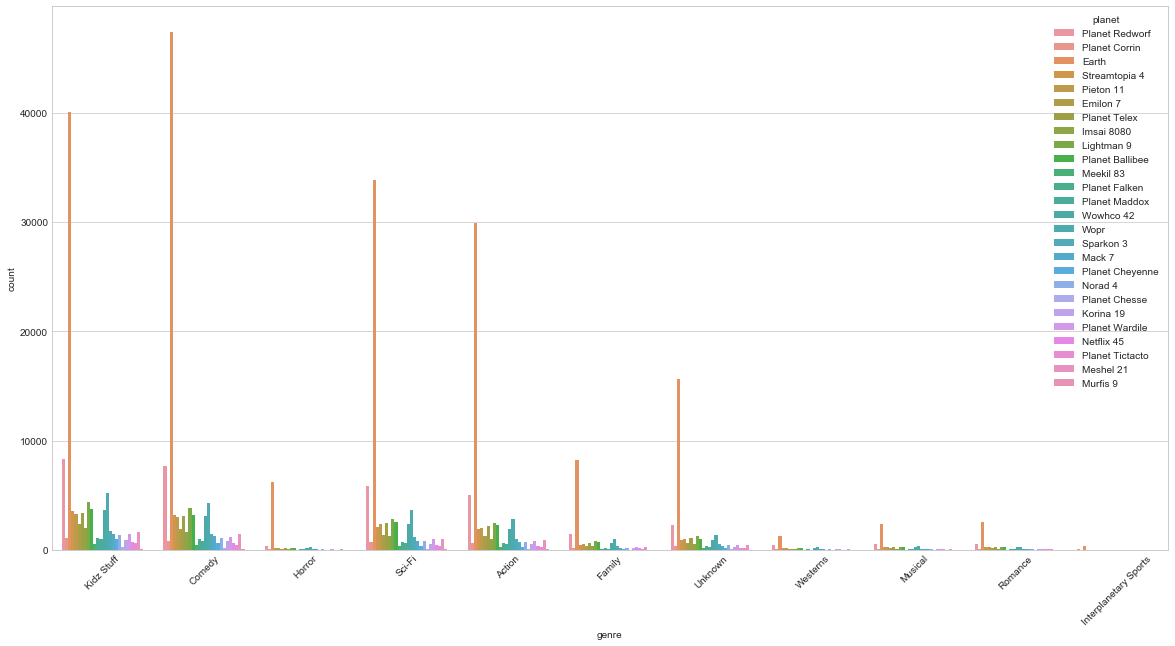

In [53]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.countplot(netflix_df.genre,hue=netflix_df.planet)